# Fake news predicion
About the Dataset:

1.id: unique id for a news article

2.title: the title of a news article

3.author: author of the news article

4.text: the text of the article; could be incomplete

5.label: a label that marks whether the news article is real or fake

    1:Fake news
    0:Real news

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
#import nltk
#nltk.download('stopwords')

In [3]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# Data Preprocessing

In [4]:
# loading the dataset to a pandas DataFrame
data = pd.read_csv('train.csv')

In [5]:
data.shape

(20800, 5)

In [6]:
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [8]:
data.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [9]:
data['label'].value_counts()

1    10413
0    10387
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

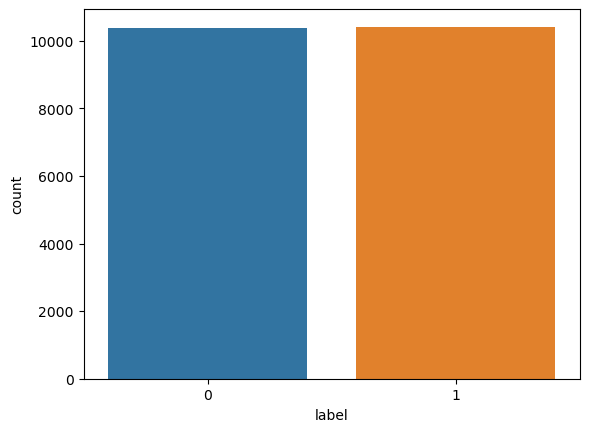

In [10]:
sns.countplot(x="label",data=data)

In [11]:
# counting the number of missing values in the dataset
data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [12]:
# replacing the null values with empty string
data = data.fillna('')

In [13]:
data.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [14]:
data.duplicated().sum()

0

In [15]:
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [16]:
data['title']=data['title'].apply(lambda x:x.split())

In [17]:
data['author']=data['author'].apply(lambda x:x.split())

In [18]:
data.head()

,id,title,author,text,label
0,0,"[House, Dem, Aide:, We, Didn’t, Even, See, Com...","[Darrell, Lucus]",House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"[FLYNN:, Hillary, Clinton,, Big, Woman, on, Ca...","[Daniel, J., Flynn]",Ever get the feeling your life circles the rou...,0
2,2,"[Why, the, Truth, Might, Get, You, Fired]",[Consortiumnews.com],"Why the Truth Might Get You Fired October 29, ...",1
3,3,"[15, Civilians, Killed, In, Single, US, Airstr...","[Jessica, Purkiss]",Videos 15 Civilians Killed In Single US Airstr...,1
4,4,"[Iranian, woman, jailed, for, fictional, unpub...","[Howard, Portnoy]",Print \nAn Iranian woman has been sentenced to...,1


In [19]:
data['title']=data['title'].apply(lambda x:[i.replace(" ","") for i in x])

In [20]:
data['author']=data['author'].apply(lambda x:[i.replace(" ","") for i in x])

In [21]:
data.head()

,id,title,author,text,label
0,0,"[House, Dem, Aide:, We, Didn’t, Even, See, Com...","[Darrell, Lucus]",House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"[FLYNN:, Hillary, Clinton,, Big, Woman, on, Ca...","[Daniel, J., Flynn]",Ever get the feeling your life circles the rou...,0
2,2,"[Why, the, Truth, Might, Get, You, Fired]",[Consortiumnews.com],"Why the Truth Might Get You Fired October 29, ...",1
3,3,"[15, Civilians, Killed, In, Single, US, Airstr...","[Jessica, Purkiss]",Videos 15 Civilians Killed In Single US Airstr...,1
4,4,"[Iranian, woman, jailed, for, fictional, unpub...","[Howard, Portnoy]",Print \nAn Iranian woman has been sentenced to...,1


In [22]:
# merging the author name and news title
data['content'] = data['author']+data['title']

In [23]:
data.head()

,id,title,author,text,label,content
0,0,"[House, Dem, Aide:, We, Didn’t, Even, See, Com...","[Darrell, Lucus]",House Dem Aide: We Didn’t Even See Comey’s Let...,1,"[Darrell, Lucus, House, Dem, Aide:, We, Didn’t..."
1,1,"[FLYNN:, Hillary, Clinton,, Big, Woman, on, Ca...","[Daniel, J., Flynn]",Ever get the feeling your life circles the rou...,0,"[Daniel, J., Flynn, FLYNN:, Hillary, Clinton,,..."
2,2,"[Why, the, Truth, Might, Get, You, Fired]",[Consortiumnews.com],"Why the Truth Might Get You Fired October 29, ...",1,"[Consortiumnews.com, Why, the, Truth, Might, G..."
3,3,"[15, Civilians, Killed, In, Single, US, Airstr...","[Jessica, Purkiss]",Videos 15 Civilians Killed In Single US Airstr...,1,"[Jessica, Purkiss, 15, Civilians, Killed, In, ..."
4,4,"[Iranian, woman, jailed, for, fictional, unpub...","[Howard, Portnoy]",Print \nAn Iranian woman has been sentenced to...,1,"[Howard, Portnoy, Iranian, woman, jailed, for,..."


In [24]:
new_data=data[['id','content','label']]

In [25]:
new_data.head()

,id,content,label
0,0,"[Darrell, Lucus, House, Dem, Aide:, We, Didn’t...",1
1,1,"[Daniel, J., Flynn, FLYNN:, Hillary, Clinton,,...",0
2,2,"[Consortiumnews.com, Why, the, Truth, Might, G...",1
3,3,"[Jessica, Purkiss, 15, Civilians, Killed, In, ...",1
4,4,"[Howard, Portnoy, Iranian, woman, jailed, for,...",1


In [26]:
new_data=data[['content','label']]

In [27]:
new_data.head()

,content,label
0,"[Darrell, Lucus, House, Dem, Aide:, We, Didn’t...",1
1,"[Daniel, J., Flynn, FLYNN:, Hillary, Clinton,,...",0
2,"[Consortiumnews.com, Why, the, Truth, Might, G...",1
3,"[Jessica, Purkiss, 15, Civilians, Killed, In, ...",1
4,"[Howard, Portnoy, Iranian, woman, jailed, for,...",1


In [28]:
#now convert this list into string and put in the new_data['content']
new_data['content']=new_data['content'].apply(lambda x:" ".join(x))

/var/folders/by/ymb55j1n39nd_1l6_11kg8j80000gn/T/ipykernel_81514/49056542.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['content']=new_data['content'].apply(lambda x:" ".join(x))


In [29]:
new_data.head()

,content,label
0,Darrell Lucus House Dem Aide: We Didn’t Even S...,1
1,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...",0
2,Consortiumnews.com Why the Truth Might Get You...,1
3,Jessica Purkiss 15 Civilians Killed In Single ...,1
4,Howard Portnoy Iranian woman jailed for fictio...,1


In [30]:
new_data['content'][0]

'Darrell Lucus House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [31]:
new_data['content'][2]

'Consortiumnews.com Why the Truth Might Get You Fired'

In [32]:
#convert all tags into lower case
new_data['content']=new_data['content'].apply(lambda x:x.lower())

/var/folders/by/ymb55j1n39nd_1l6_11kg8j80000gn/T/ipykernel_81514/718244736.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['content']=new_data['content'].apply(lambda x:x.lower())


In [33]:
new_data['content'][0]

'darrell lucus house dem aide: we didn’t even see comey’s letter until jason chaffetz tweeted it'

In [34]:
#stemming is technique used to convert['loved','loving','love'] into
#['love','love','love']
!pip install nltk

In [35]:
import nltk
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [36]:
def stem(text):
    y=[]
    for i in text.split():#convert string into list
        y.append(ps.stem(i))
        #ps.stem is used to convert word into root words
    #convert list into string
    return " ".join(y)

In [37]:
new_data['content'].apply(stem)

0        darrel lucu hous dem aide: we didn’t even see ...
1        daniel j. flynn flynn: hillari clinton, big wo...
2        consortiumnews.com whi the truth might get you...
3        jessica purkiss 15 civilian kill in singl us a...
4        howard portnoy iranian woman jail for fiction ...
                               ...                        
20795    jerom hudson rapper t.i.: trump a ’poster chil...
20796    benjamin hoffman n.f.l. playoffs: schedule, ma...
20797    michael j. de la merc and rachel abram macy’ i...
20798    alex ansari nato, russia to hold parallel exer...
20799                david swanson what keep the f-35 aliv
Name: content, Length: 20800, dtype: object

In [38]:
new_data['content']=new_data['content'].apply(stem)

/var/folders/by/ymb55j1n39nd_1l6_11kg8j80000gn/T/ipykernel_81514/1407356651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['content']=new_data['content'].apply(stem)


In [39]:
new_data['content'][0]

'darrel lucu hous dem aide: we didn’t even see comey’ letter until jason chaffetz tweet it'

In [40]:
#separating the data and label
X = new_data['content']
Y = new_data['label']

In [41]:
X

0        darrel lucu hous dem aide: we didn’t even see ...
1        daniel j. flynn flynn: hillari clinton, big wo...
2        consortiumnews.com whi the truth might get you...
3        jessica purkiss 15 civilian kill in singl us a...
4        howard portnoy iranian woman jail for fiction ...
                               ...                        
20795    jerom hudson rapper t.i.: trump a ’poster chil...
20796    benjamin hoffman n.f.l. playoffs: schedule, ma...
20797    michael j. de la merc and rachel abram macy’ i...
20798    alex ansari nato, russia to hold parallel exer...
20799                david swanson what keep the f-35 aliv
Name: content, Length: 20800, dtype: object

In [42]:
Y

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64

In [43]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

Xs = vectorizer.transform(X)

In [44]:
print(Xs)

  (0, 20083)	0.18513603892347877
  (0, 19452)	0.2735442639240402
  (0, 19112)	0.2547006225991656
  (0, 16483)	0.22076398151078291
  (0, 11079)	0.3112890659869252
  (0, 10754)	0.25009974547778013
  (0, 9699)	0.2121959470951579
  (0, 9602)	0.15015156086333914
  (0, 8839)	0.1914679642820427
  (0, 6439)	0.1997517703057157
  (0, 5260)	0.2540066973529246
  (0, 4999)	0.23431383403253717
  (0, 4767)	0.30811924379137356
  (0, 3956)	0.21133365893512257
  (0, 3407)	0.3147612133526859
  (0, 811)	0.3400125470717784
  (1, 20433)	0.2957534028592017
  (1, 13144)	0.15807218823479888
  (1, 8615)	0.1956590066021249
  (1, 7107)	0.7025382285074343
  (1, 4732)	0.2593840730087929
  (1, 3782)	0.18823022292597608
  (1, 3104)	0.3822119257689172
  (1, 2717)	0.15265747286920414
  (1, 2262)	0.28913616904285955
  :	:
  (20797, 9561)	0.127217213175741
  (20797, 8881)	0.2107775693231549
  (20797, 4818)	0.20490347689494498
  (20797, 2997)	0.1466188244590418
  (20797, 2017)	0.3242834183331098
  (20797, 1315)	0.29670505

## Splitting the dataset into training & test data

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(Xs, Y, test_size = 0.2, stratify=Y, random_state=42)

In [46]:
#USE DIFFERENT DIFFERNT MODEL TO CHECK THE ACCURACY(TRAINING AND TESTING ACCURACY).
#I WILL USE ONLY THOSE MODEL FOR FURTHER STEP(TRAINING STAGE)WHICH GIVE PROPER VALUE OF ACCURACY
#BECAUSE THE MODEL WHICH GIVE PROPER ACCURACY CAN PREDICT THE RESULT IN BETTER WAY
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
results=[]
names=[]
# create instances of all models
models = {
    #'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Logistic Regression': LogisticRegression(),
    #'Naive Bayes': GaussianNB(),
    #'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
   # 'Bagging': BaggingClassifier(),
    #'AdaBoost': AdaBoostClassifier(),
    #'Gradient Boosting': GradientBoostingClassifier(),
   # 'Extra Trees': ExtraTreeClassifier(),
    
}
from sklearn.metrics import accuracy_score
print("TRAINING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    X_train_prediction = model.predict(X_train)
    trainacc = accuracy_score( X_train_prediction, Y_train)
    print(f'{name}:\ntrainAccuracy: {trainacc:.4f}')
#for testing  data  
print("TESTING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    testacc = accuracy_score(Y_test, y_pred)
    print(f'{name}:\ntestingAccuracy: {testacc:.4f}') 

TRAINING ACCURACY:
Logistic Regression:
trainAccuracy: 0.9871


/Users/pritikumari/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K-Nearest Neighbors:
trainAccuracy: 0.9650
Decision Tree:
trainAccuracy: 1.0000
Random Forest:
trainAccuracy: 1.0000
TESTING ACCURACY:
Logistic Regression:
testingAccuracy: 0.9733


/Users/pritikumari/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K-Nearest Neighbors:
testingAccuracy: 0.9351
Decision Tree:
testingAccuracy: 0.9918
Random Forest:
testingAccuracy: 0.9887


### logistic Regression Is better for this model so i will go with logistic regression for further prediction

In [47]:
#random Forest has good both training and testing accuracy
model = LogisticRegression()

In [48]:
model.fit(X_train,Y_train)

LogisticRegression()

In [49]:
# again i will find both traning and testing accuracy for drawing confusion matrix
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [50]:
print(X_train_prediction)

[0 0 1 ... 0 1 1]


In [51]:
training_data_accuracy

0.987139423076923

In [52]:
# accuracy on test data
X_test_prediction=model.predict(X_test).round()#that is Ypred also
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [53]:
test_data_accuracy

0.9733173076923077

<AxesSubplot:>

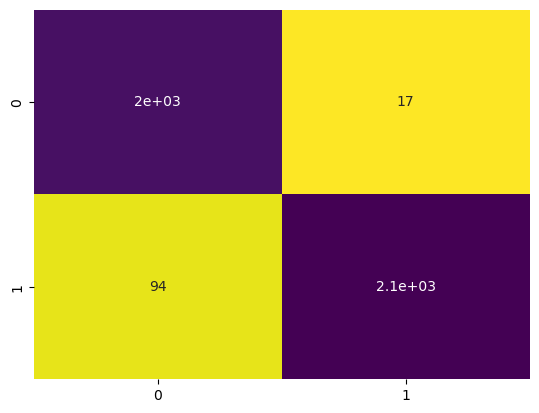

In [54]:
#confusion matrix for that
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(X_test_prediction,Y_test) 
sns.heatmap(cm, annot=True, cbar=False, cmap="viridis_r",
            yticklabels=model.classes_, xticklabels=model.classes_)

In [55]:
from sklearn import metrics
# Print the confusion matrix

metrics.confusion_matrix(Y_test, X_test_prediction)

array([[1983,   94],
       [  17, 2066]])

In [56]:
# Print the precision and recall, among other metrics
print(metrics.classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2077
           1       0.96      0.99      0.97      2083

    accuracy                           0.97      4160
   macro avg       0.97      0.97      0.97      4160
weighted avg       0.97      0.97      0.97      4160



/Users/pritikumari/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/pritikumari/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Logistic Regression')

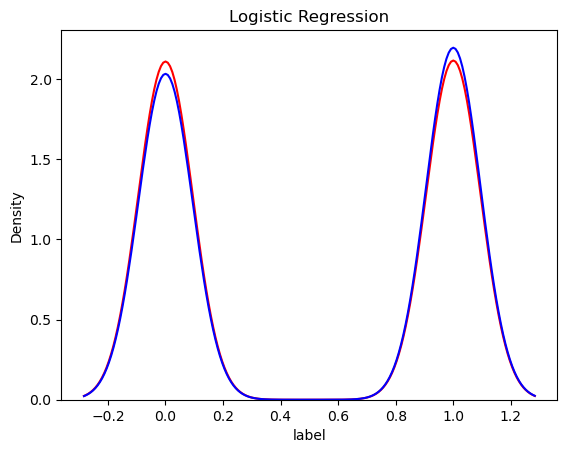

In [57]:
ax=sns.distplot(Y_test,hist=False,color="r",label="Actual value")
sns.distplot(X_test_prediction,hist=False,color="b",label="Predicted value",ax=ax)
plt.title('Logistic Regression')

## Building a Predictive System

In [71]:
X_new = ['aaron klein obama’ organ for action partner with soros-link ‘indivisible’ to disrupt trump’ agenda']
input_data_features = vectorizer.transform(X_new)
prediction = model.predict(input_data_features)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[0]
The news is Real


In [70]:
new_data['content'][10]

'aaron klein obama’ organ for action partner with soros-link ‘indivisible’ to disrupt trump’ agenda'

In [69]:
new_data['label'][10]

0

## 
X_new = X_test[10]

prediction = model.predict(X_new)

print(prediction)


if (prediction[0]==0):
  
  print('The news is Real')

else:
  
  print('The news is Fake')

print(Y_test[10])  

In [81]:
import pandas_profiling
import pandas_profiling as pf
from pandas_profiling import ProfileReport
from sklearn import metrics

In [78]:
pandas_profiling.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [83]:
kk=ProfileReport(data)

In [84]:
kk.to_file("output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]